In [8]:
using Plots
using RDatasets
include("../src/DPMeans.jl")
gr()


Plots.GRBackend()

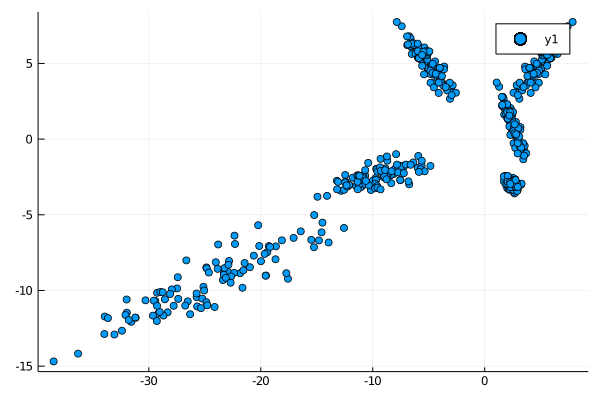

In [9]:
a = rand(MvNormal([5, 5], [[1, .9]  [.9, 1]]), 100)'
b = a * [-1 0; 0 1]
c = a * [-5 .1; .1 -2]
d = a * [-2 .5; .1 -1]
e = a * [-.5 0; 0 1] .- [-5 4]
f = a * [-.2 .5; .5 -.5] .- [-1 3]

# println("shapes ", size(a), size(b))
data = vcat(a, b, c, d, e, f)
println("")
gr()
scatter(data[:, 1], data[:, 2])
# plot!(-collect(1:10) .+ 5, collect(1:10) .- 5)

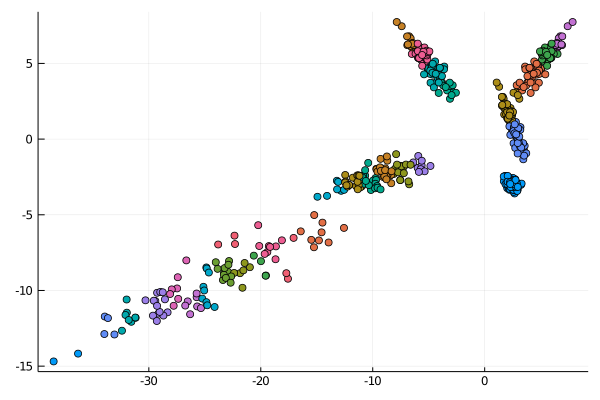

In [10]:
model = DPMeans(2)
fit!(model, data, 5)
labels = get_labels(model, data)

scatter(data[:, 1], data[:, 2], color=labels, legend=false)

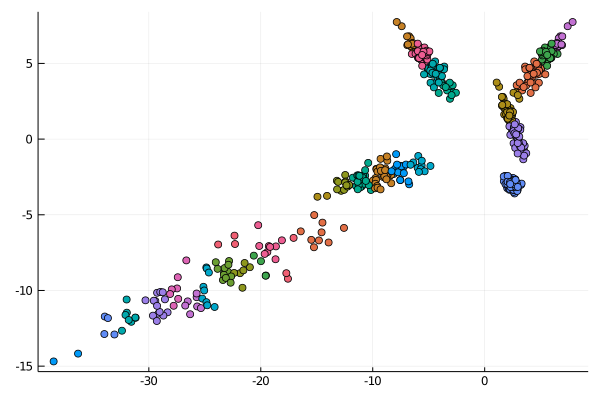

In [11]:
# Test more iterations yeilds similar result.
model = DPMeans(2)
fit!(model, data, 50)
labels = get_labels(model, data)

scatter(data[:, 1], data[:, 2], color=labels, legend=false)

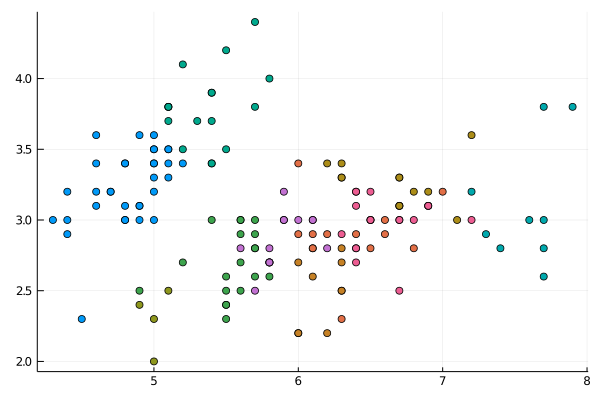

In [12]:
# Test higher dimensions.
data = dataset("datasets", "iris")
data = convert(Matrix, data[:, 1:4])

model = DPMeans(1)
fit!(model, data, 5)
labels = get_labels(model, data)

scatter(data[:, 1], data[:, 2], color=labels, legend=false)